# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Vishal Gupta

EID: vg22846

Name: Kaushik Kumaran

EID: kk34537

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:
Gradient boosting approaches builds trees on the residuals of the error, and keep on building trees on the residuals obtained after every iteration, but AdaBoost always uses the original dataset to build the tree but uses the weight of misclassification of each datapoint as obtai on the previous model output. The technique of Boosting uses various loss functions. In case of Adaptive Boosting or AdaBoost, it minimises the exponential loss function that can make the algorithm sensitive to the outliers. With Gradient Boosting, any differentiable loss function can be utilised. Gradient Boosting algorithm is more robust to outliers than AdaBoost.

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [ ]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

    x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = (x0_max / x0_min)/100
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    plt.subplot(1, 1, 1)
    y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
    y_pred = y_pred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.xlim(xx0.min(), xx0.max())
    plt.title('SVC with {} kernel'.format(kernel))
    plt.show()

In [ ]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
    svc = SVC(kernel=kernel, C=C, gamma=gamma)
    svc.fit(X, y)
    return svc

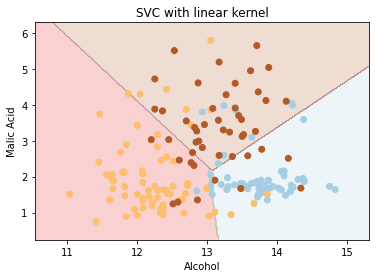

In [ ]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## Answer:

### Part b

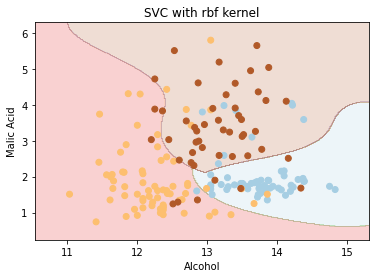

In [ ]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')

Changing the kernel from linear to rbf have made the decision bounary non-linear and complex. And by doing so we are able to fit the data significantly better than the linear kernel.

### Part c

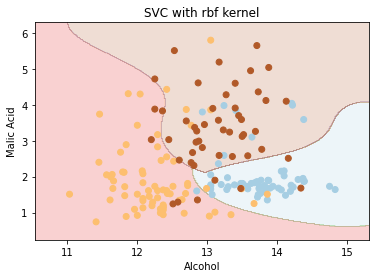

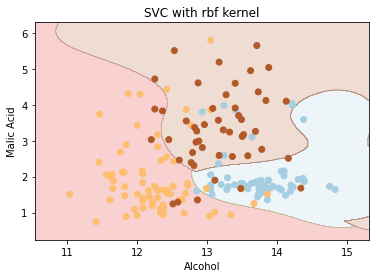

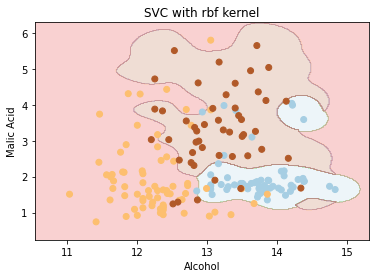

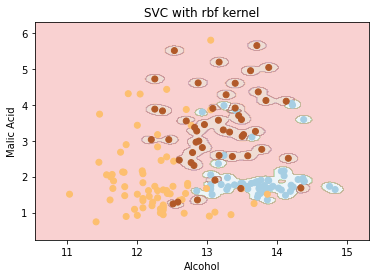

In [ ]:
gamma_list = [0.5, 1, 10, 100]
for gamma in gamma_list:
    svc = train_model(X, y, kernel='rbf', C=1, gamma=gamma)
    plot_model(X, y, svc, kernel='rbf')

Increasing the gamma value seems to be affecting the complexity of the non linear decision boundary. With increase value of gamma we are able to segregate the classes a lot better but it may be possible that higher values of gamma can lead to overfitting.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## Answer:

### Part a

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# fitting decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('Decision Tree accuracy: ', accuracy_score(y_test, dt_pred))

dt_pred_prob = dt.predict_proba(X_test)[:, 1]
print('Decision Tree AuROC: ', roc_auc_score(y_test, dt_pred_prob))

Decision Tree accuracy:  0.9098090849242922
Decision Tree AuROC:  0.9040453749567611


In [ ]:
# fitting logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10, solver="newton-cg")

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Logistic Regression accuracy: ', accuracy_score(y_test, lr_pred))

lr_pred_prob = lr.predict_proba(X_test)[:, 1]
print('Logistic Regression AuROC: ', roc_auc_score(y_test, lr_pred_prob))

Logistic Regression accuracy:  0.9315339038841343
Logistic Regression AuROC:  0.9734682742610166


### Part b

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# bagging decision trees
bagging_dt = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=10)

bagging_dt.fit(X_train, y_train)
bagging_pred = bagging_dt.predict(X_test)
print('Bagging Decision Trees accuracy: ', accuracy_score(y_test, bagging_pred))

bagging_pred_prob = bagging_dt.predict_proba(X_test)[:, 1]
print('Bagging Decision Trees AuROC: ', roc_auc_score(y_test, bagging_pred_prob))

Bagging Decision Trees accuracy:  0.9368005266622779
Bagging Decision Trees AuROC:  0.9796839729119637


In [ ]:
# bagging logistic regression
bagging_lr = BaggingClassifier(base_estimator=lr, n_estimators=50, random_state=10)

bagging_lr.fit(X_train, y_train)
bagging_pred = bagging_lr.predict(X_test)
print('Bagging Logistic Regression accuracy: ', accuracy_score(y_test, bagging_pred))

bagging_pred_prob = bagging_lr.predict_proba(X_test)[:, 1]
print('Bagging Logistic Regression AuROC: ', roc_auc_score(y_test, bagging_pred_prob))

Bagging Logistic Regression accuracy:  0.934167215273206
Bagging Logistic Regression AuROC:  0.97552769248874


Bagging improves both **Accuracy score** and **Area under Curve of ROC** for both the classifers - Decision Tree & Logistic Regression. Though the impact of using Bagging is signigicantly high in Decision tree as accuracy jumped from 91% to 94%, while for Logistic regression the gain is very minuscle. This can be due to the inherent nature of the classifiers - Logistic regression models are high bias model and decision boundary doesn't change that significantly when data is sligtly changed but the same can't be said for Decision trees. Hence each model in Bagging ensemble in Decision tree will be very different from each other and higher performance increase is observed.

### Part c

In [ ]:
# Grid search CV with Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_params = {"n_estimators": [10, 100, 500], 
             "criterion": ['gini', 'entropy'],
             "random_state": [42]}
rf = GridSearchCV(RandomForestClassifier(), rf_params)
rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 100, 500], 'random_state': [42]})

In [ ]:
best_model_idx = np.argmin(rf.cv_results_['rank_test_score'])
print('Best model parameters - ', rf.cv_results_['params'][best_model_idx])

Best model parameters -  {'criterion': 'gini', 'n_estimators': 500, 'random_state': 42}


In [ ]:
rf_best = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=42)
rf_best.fit(X_train, y_train)

rf_pred = rf_best.predict(X_test)
print('Tuned Random Forest accuracy: ', accuracy_score(y_test, rf_pred))

rf_pred_prob = rf_best.predict_proba(X_test)[:, 1]
print('Tuned Random Forest AuROC: ', roc_auc_score(y_test, rf_pred_prob))

Tuned Random Forest accuracy:  0.9552337063857801
Tuned Random Forest AuROC:  0.9891234188838844


### Part d

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {"n_estimators":[10, 100, 500], 
             "learning_rate":[0.01, 0.1, 0.5], 
             "max_depth":[3, 5, 10], 
             "subsample":[0.5, 0.7, 1.0], 
             "random_state":[42]}
gb = GridSearchCV(GradientBoostingClassifier(), gb_params)
gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 100, 500], 'random_state': [42],
                         'subsample': [0.5, 0.7, 1.0]})

In [ ]:
best_model_idx = np.argmin(gb.cv_results_['rank_test_score'])
print('Best model parameters - ', gb.cv_results_['params'][best_model_idx])

Best model parameters -  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'random_state': 42, 'subsample': 1.0}


In [ ]:
gb_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=500, random_state=42, subsample=1.0)
gb_best.fit(X_train, y_train)

gb_pred = gb_best.predict(X_test)
print('Tuned Gradient Boosting accuracy: ', accuracy_score(y_test, gb_pred))

gb_pred_prob = gb_best.predict_proba(X_test)[:, 1]
print('Tuned Gradient Boosting AuROC: ', roc_auc_score(y_test, gb_pred_prob))

Tuned Gradient Boosting accuracy:  0.9552337063857801
Tuned Gradient Boosting AuROC:  0.9889094533537314


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab_params = {"n_estimators":[10, 100, 500], 
             "learning_rate":[0.01, 0.1, 0.5], 
             "random_state":[42]}
ab = GridSearchCV(AdaBoostClassifier(), ab_params)
ab.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [10, 100, 500], 'random_state': [42]})

In [ ]:
best_model_idx = np.argmin(ab.cv_results_['rank_test_score'])
print('Best model parameters - ', ab.cv_results_['params'][best_model_idx])

Best model parameters -  {'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}


In [ ]:
ab_best = AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=42)
ab_best.fit(X_train, y_train)

ab_pred = ab_best.predict(X_test)
print('Tuned AdaBoosting accuracy: ', accuracy_score(y_test, ab_pred))

ab_pred_prob = ab_best.predict_proba(X_test)[:, 1]
print('Tuned AdaBoosting AuROC: ', roc_auc_score(y_test, ab_pred_prob))

Tuned AdaBoosting accuracy:  0.9512837393021725
Tuned AdaBoosting AuROC:  0.9858836241481498


### Part e

In [ ]:
import itertools
model_type = ['rf', 'gb', 'ab']
estimators_list = [10, 100, 500]

output_df = pd.DataFrame(list(itertools.product(model_type, estimators_list)), columns=['model', 'n_estimator'])

accuracy_list = []
area_under_roc_list = []

for m_type, n_estimators in output_df.values:
    if m_type == 'rf':
        model = RandomForestClassifier(criterion='gini', n_estimators=n_estimators, random_state=42)
    elif m_type == 'gb':
        model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=n_estimators, 
                                           random_state=42, subsample=1.0)
    else:
        model = AdaBoostClassifier(learning_rate=0.1, n_estimators=n_estimators, random_state=42)
        
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred_prob)
    
    accuracy_list.append(accuracy)
    area_under_roc_list.append(auroc)

output_df['accuracy'] = accuracy_list
output_df['area_under_roc'] = area_under_roc_list

In [ ]:
output_df

,model,n_estimator,accuracy,area_under_roc
0,rf,10,0.945359,0.981291
1,rf,100,0.956550,0.988330
2,rf,500,0.955234,0.989123
3,gb,10,0.895326,0.954392
4,gb,100,0.950625,0.987073
5,gb,500,0.955234,0.988909
6,ab,10,0.844635,0.936802
7,ab,100,0.940092,0.983828
8,ab,500,0.951284,0.985884


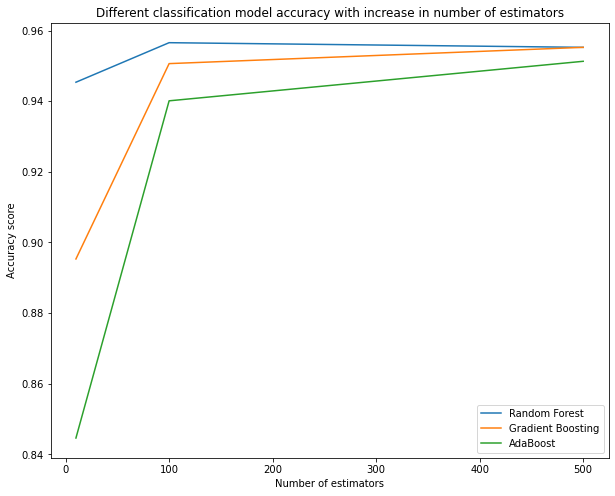

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(estimators_list, output_df.loc[output_df['model'] == 'rf', 'accuracy'], label='Random Forest')

plt.plot(estimators_list, output_df.loc[output_df['model'] == 'gb', 'accuracy'], label='Gradient Boosting')

plt.plot(estimators_list, output_df.loc[output_df['model'] == 'ab', 'accuracy'], label='AdaBoost')

plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy score')
plt.title('Different classification model accuracy with increase in number of estimators')
plt.show()

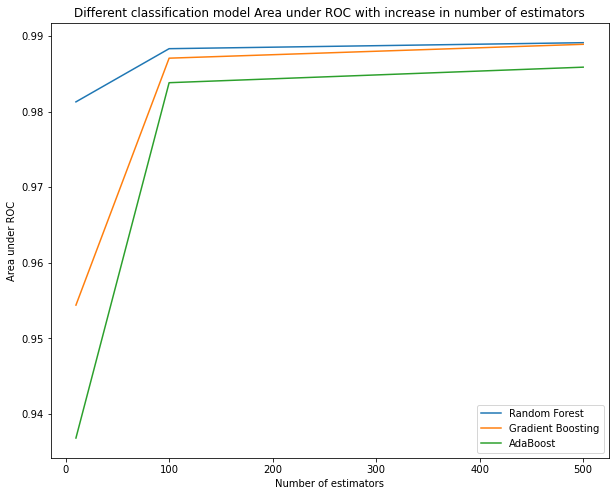

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(estimators_list, output_df.loc[output_df['model'] == 'rf', 'area_under_roc'], label='Random Forest')

plt.plot(estimators_list, output_df.loc[output_df['model'] == 'gb', 'area_under_roc'], label='Gradient Boosting')

plt.plot(estimators_list, output_df.loc[output_df['model'] == 'ab', 'area_under_roc'], label='AdaBoost')

plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Area under ROC')
plt.title('Different classification model Area under ROC with increase in number of estimators')
plt.show()